In [30]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
# PWD
import os
os.getcwd()

'C:\\Users\\sushant\\mushroom_data'

In [32]:
#Loading train and test data
train=pd.read_csv('mushroom_train.csv')
test=pd.read_csv('mushroom_test.csv')

In [33]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [34]:
# print unique class
print(train['class'].unique())

['p' 'e']


In [5]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


In [29]:
print("The size of train data is ",train.shape)
print("The size of test data is ",test.shape)

The size of train data is  (5686, 25)
The size of test data is  (2438, 24)


In [12]:
# A peek at data
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [13]:
# Find categorical & continuous features.
categorical=train.dtypes[train.dtypes=='object']
continuous=train.dtypes[train.dtypes=='int64']
print("Categorical Features: "+str([i[0] for i in categorical.iteritems()]))
print("\nContinuous Features: "+str([i[0] for i in continuous.iteritems()]))
print("\nTarget Variable: "+str([train.columns[0]]))

Categorical Features: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Continuous Features: ['radius', 'weight']

Target Variable: ['class']


As per the description of the features above.<br/>
It seems that only 2 are continuous features while the rest are categorical.<br>
So, **we will encode the categorical features.**<br>
But first,let's see if there are any missing values.

In [14]:
# checking for missing values
train.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Univariate Analysis

In [19]:
# For Categorical Variables we use count for analysis
for var in categorical.iteritems():
    print(var[0])
    print 
    counts = train[var[0]].value_counts()
    totalCounts = sum([x[1] for x in counts.iteritems()])
    for name,val in counts.iteritems():
        print("%.2f%%"%((val*1.0/totalCounts)*100.0),name,"(%d)"%(val))
    print()

class
51.79% e (2945)
48.21% p (2741)

cap-shape
45.34% x (2578)
38.32% f (2179)
10.38% k (590)
5.49% b (312)
0.40% s (23)
0.07% c (4)

cap-surface
40.36% y (2295)
31.01% s (1763)
28.56% f (1624)
0.07% g (4)

cap-color
28.14% n (1600)
22.72% g (1292)
18.47% e (1050)
13.30% y (756)
12.66% w (720)
1.97% b (112)
1.83% p (104)
0.56% c (32)
0.21% u (12)
0.14% r (8)

bruises
58.00% f (3298)
42.00% t (2388)

odor
43.74% n (2487)
26.40% f (1501)
7.23% s (411)
7.00% y (398)
4.92% l (280)
4.75% a (270)
3.31% p (188)
2.23% c (127)
0.42% m (24)

gill-attachment
97.64% f (5552)
2.36% a (134)

gill-spacing
83.87% c (4769)
16.13% w (917)

gill-size
69.10% b (3929)
30.90% n (1757)

gill-color
21.10% b (1200)
18.75% p (1066)
14.84% w (844)
12.80% n (728)
9.32% h (530)
9.25% g (526)
6.00% u (341)
4.73% k (269)
1.23% e (70)
0.98% y (56)
0.69% o (39)
0.30% r (17)

stalk-shape
56.70% t (3224)
43.30% e (2462)

stalk-root
46.87% b (2665)
30.37% ? (1727)
13.72% e (780)
6.72% c (382)
2.32% r (132)

stalk-surfa

In [20]:
# For Continuous Variables we use describe
train.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


### Bivariate Analysis

In [21]:
# For Categorical-Categorical we use CROSSTAB
alreadyDone = []
for i in categorical.iteritems():
    for j in categorical.iteritems():
        if(i[0]!=j[0] and (i[0],j[0]) not in alreadyDone and (j[0],i[0]) not in alreadyDone):
            alreadyDone.append((i[0],j[0]))
            print(pd.crosstab(index=train[i[0]],columns=train[j[0]]))
            print()

cap-shape    b  c     f    k   s     x
class                                 
e          278  0  1094  161  23  1389
p           34  4  1085  429   0  1189

cap-surface     f  g    s     y
class                          
e            1090  0  790  1065
p             534  4  973  1230

cap-color   b   c    e    g    n   p  r   u    w    y
class                                                
e          33  24  453  728  872  42  8  12  497  276
p          79   8  597  564  728  62  0   0  223  480

bruises     f     t
class              
e        1004  1941
p        2294   447

odor     a    c     f    l   m     n    p    s    y
class                                              
e      270    0     0  280   0  2395    0    0    0
p        0  127  1501    0  24    92  188  411  398

gill-attachment    a     f
class                     
e                121  2824
p                 13  2728

gill-spacing     c    w
class                  
e             2106  839
p             2663   78

g

odor           a   c    f    l   m     n   p    s    y
cap-surface                                           
f             18  67  455   19   0  1065   0    0    0
g              0   0    0    0   0     4   0    0    0
s            104  60  385  102   0   611  96  205  200
y            148   0  661  159  24   807  92  206  198

gill-attachment    a     f
cap-surface               
f                  0  1624
g                  0     4
s                121  1642
y                 13  2282

gill-spacing     c    w
cap-surface            
f             1179  445
g                0    4
s             1327  436
y             2263   32

gill-size       b    n
cap-surface           
f            1426  198
g               0    4
s             985  778
y            1518  777

gill-color     b   e    g    h    k    n   o    p  r    u    w   y
cap-surface                                                       
f              0   0  220  219   74  252   0  451  0  178  230   0
g              0   0 

veil-type     p
cap-color      
b           112
c            32
e          1050
g          1292
n          1600
p           104
r             8
u            12
w           720
y           756

veil-color   n   o     w  y
cap-color                  
b            0   0   112  0
c            0   0    32  0
e            0   0  1050  0
g            0   0  1292  0
n           70  51  1479  0
p            0   0   104  0
r            0   0     8  0
u            0   0    12  0
w            0   0   720  0
y            0   0   748  8

ring-number  n     o    t
cap-color                
b            0    63   49
c            8    20    4
e            8  1009   33
g            0  1181  111
n            8  1538   54
p            0    44   60
r            0     8    0
u            0    12    0
w            0   596  124
y            0   756    0

ring-type    e   f    l  n    p
cap-color                      
b           33   0    0  0   79
c           20   0    0  8    4
e          622   0    0  8  4

population    a    c    n    s    v    y
odor                                    
a             0    0   84  122   31   33
c             0    0    0   63   64    0
f             0    0    0   99  935  467
l             0    0   87  121   37   35
m             0   24    0    0    0    0
n           255  218  108  373  849  684
p             0    0    0   99   89    0
s             0    0    0    0  411    0
y             0    0    0    0  398    0

habitat     d    g    l   m    p   u    w
odor                                     
a          31  116    0  89   34   0    0
c         127    0    0   0    0   0    0
f         436  400  130   0  438  97    0
l          37  123    0  86   34   0    0
m          24    0    0   0    0   0    0
n        1294  765  172  23   27  67  139
p           0   96    0   0    0  92    0
s         136    0  141   0  134   0    0
y         142    0  125   0  131   0    0

gill-spacing        c    w
gill-attachment           
a                 134    0
f   

stalk-surface-below-ring    f    k    s   y
gill-color                                 
b                           0  599  601   0
e                           0    0   70   0
g                           0  328  198   0
h                         113  312  105   0
k                          53    0  216   0
n                          70    0  613  45
o                           0    0   39   0
p                         111  343  569  43
r                           0    0   17   0
u                           7    0  334   0
w                          54   32  660  98
y                           0    0   41  15

stalk-color-above-ring    b   c   e    g    n   o    p    w  y
gill-color                                                    
b                         0   0   0    0    0   0  598  602  0
e                         0   0  36    0    0   0    0   34  0
g                        94   0   0    0   96   0  102  234  0
h                       105   0   0    0  100   0  107  218  0
k    

ring-type      e   f    l   n     p
stalk-root                         
?           1363  32    0   0   332
b             35   0  911   0  1719
c              8   0    0  24   350
e            525   0    0   0   255
r              0   0    0   0   132

spore-print-color   b     h    k    n   o   r   u     w   y
stalk-root                                                 
?                  32    32    0   31  26   0   0  1574  32
b                   0  1110  669  723   0  52  35    76   0
c                   0     0  165  185   0   0   0    32   0
e                   0     0  386  394   0   0   0     0   0
r                   0     0   64   68   0   0   0     0   0

population    a    c    n    s     v     y
stalk-root                                
?             0  202  108  103  1297    17
b             0    8    0  162  1395  1100
c             0   32  171  179     0     0
e           255    0    0  369   122    34
r             0    0    0   64     0    68

habitat        d    g   

spore-print-color        b    h    k    n   o   r   u    w   y
stalk-color-above-ring                                        
b                        0  297    0    0   0   0   0    0   0
c                        0    0    0    0   0   0   0   24   0
e                        0    0    0    0   0   0   0   70   0
g                        0    0  212  218   0   0   0    0   0
n                        0  302    0    0   0   0   0   13   0
o                       32    0    0   31  26   0   0    0  32
p                        0  312  189  200   0   0   0  598   0
w                        0  231  883  952   0  52  35  969   0
y                        0    0    0    0   0   0   0    8   0

population                a   c    n    s     v    y
stalk-color-above-ring                              
b                         0   0    0    0   146  151
c                         0  24    0    0     0    0
e                         0  70    0    0     0    0
g                         0   0    0    0

habitat              d    g    l   m    p   u    w
spore-print-color                                 
b                    0    0   32   0    0   0    0
h                  337  400    0   0  308  97    0
k                  669  417    0  84   34  80    0
n                  723  443   31  91   34  79    0
o                    0    0   26   0    0   0    0
r                    0   29    0  23    0   0    0
u                   35    0    0   0    0   0    0
w                  463  211  447   0  422   0  139
y                    0    0   32   0    0   0    0

habitat        d    g    l   m    p    u    w
population                                   
a              0  255    0   0    0    0    0
c             24    0   79   0    0    0  139
n              0  195    0  84    0    0    0
s             63  593    0  91   33   97    0
v           1348  275  489  23  554  125    0
y            792  182    0   0  211   34    0



Correlation between radius and weight is -0.01


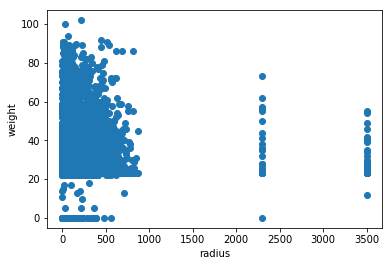

In [22]:
# For Continuous we use Scatter Plot and Correlation
alreadyDone = []
for i in continuous.iteritems():
    for j in continuous.iteritems():
        if(i[0]!=j[0] and (i[0],j[0]) not in alreadyDone and (j[0],i[0]) not in alreadyDone):
            alreadyDone.append((i[0],j[0]))
            print("Correlation between %s and %s is %.2f"%(i[0],j[0],train[i[0]].corr(train[j[0]])))
            plt.scatter(train[i[0]],train[j[0]])
            plt.xlabel("%s"%(i[0]))
            plt.ylabel("%s"%(j[0]))
            plt.show()

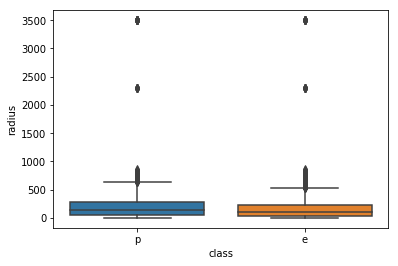

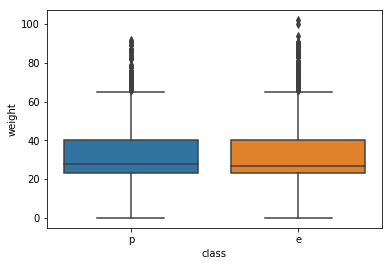

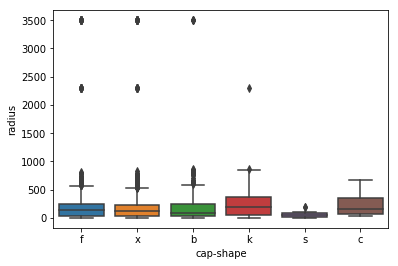

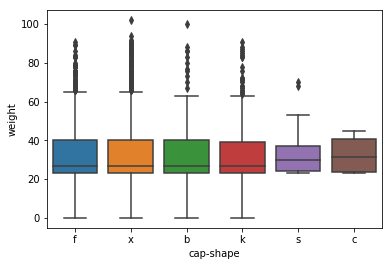

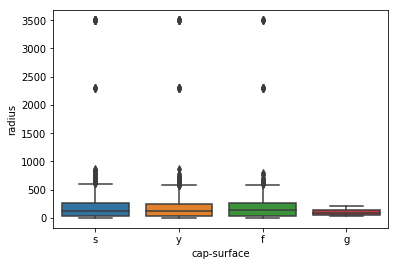

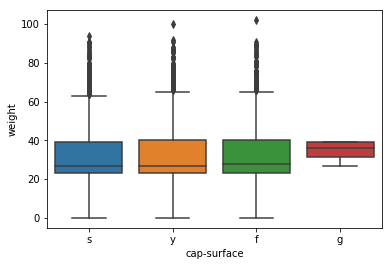

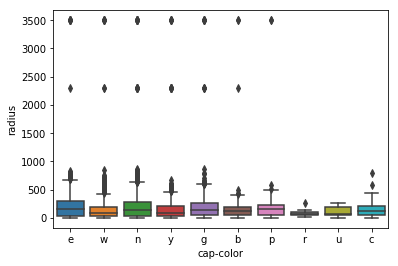

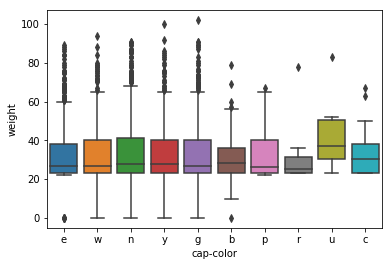

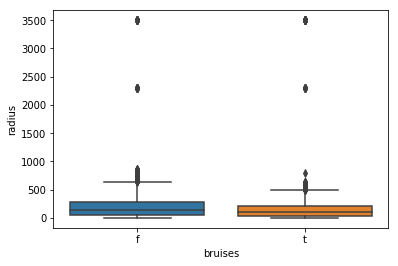

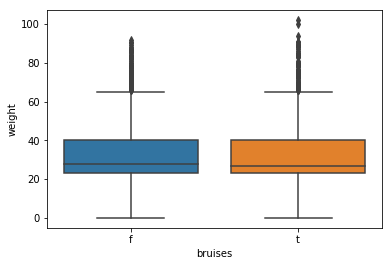

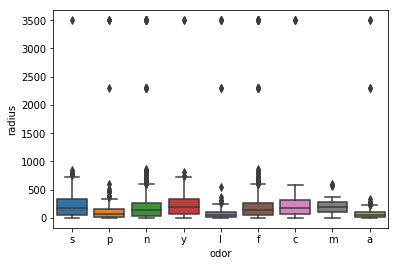

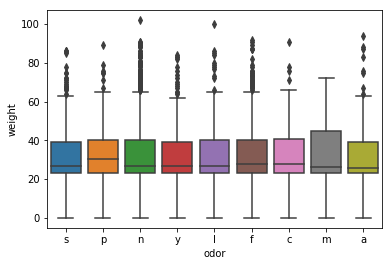

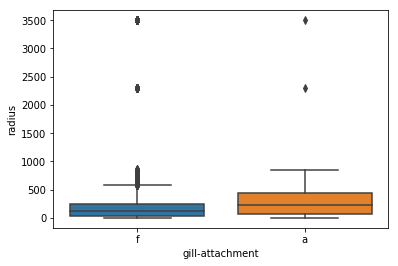

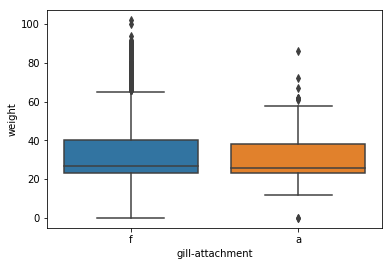

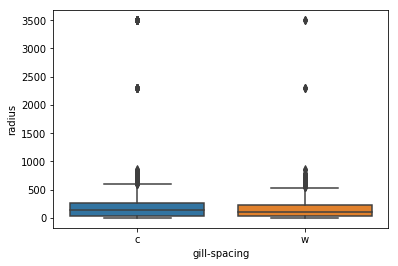

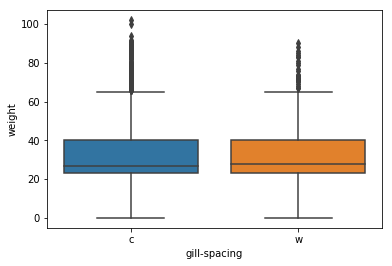

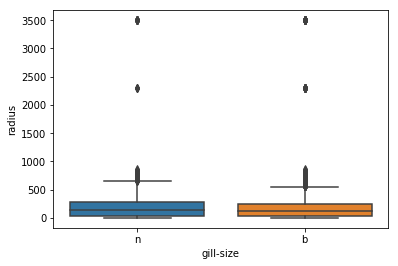

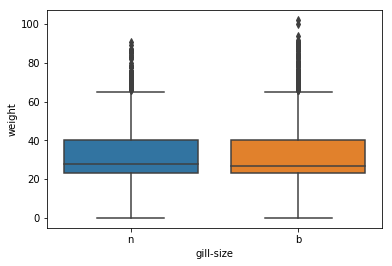

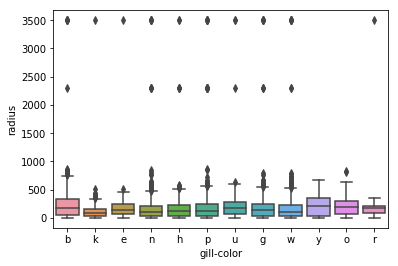

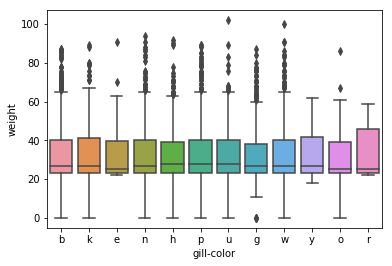

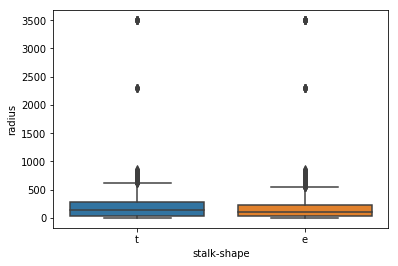

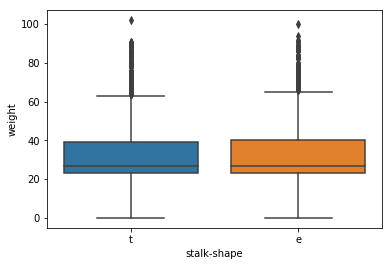

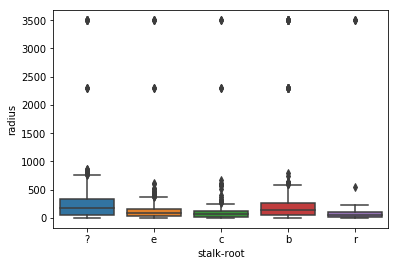

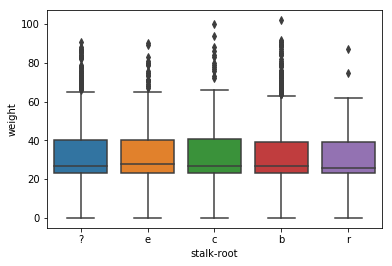

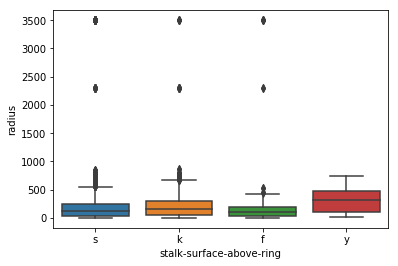

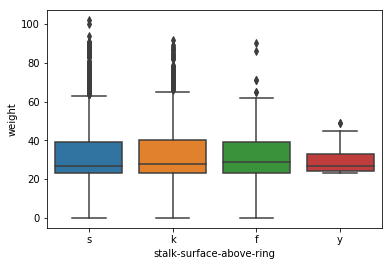

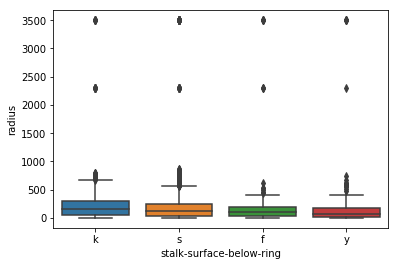

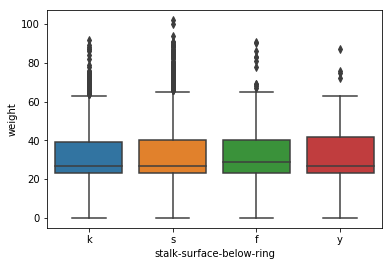

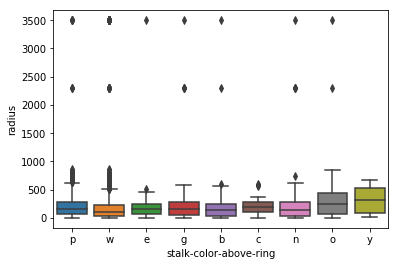

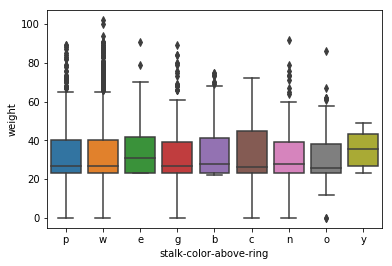

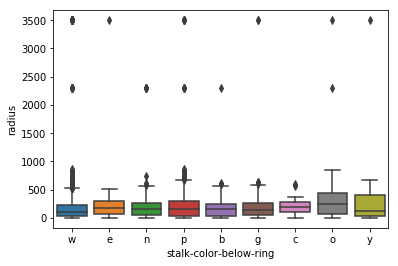

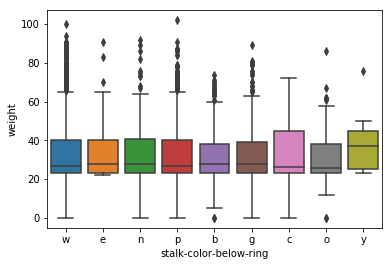

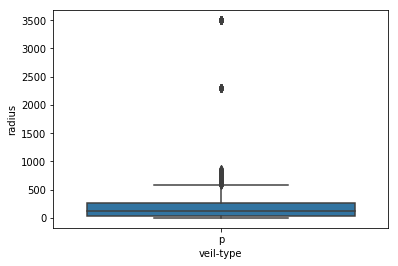

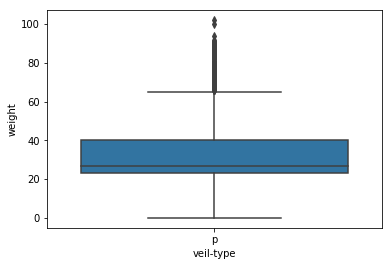

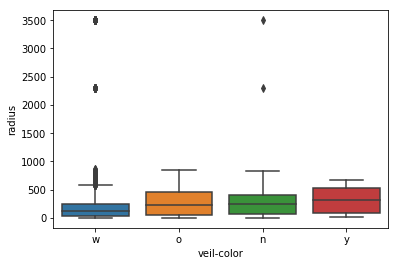

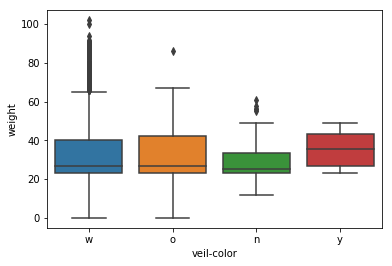

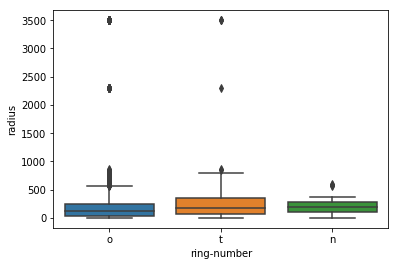

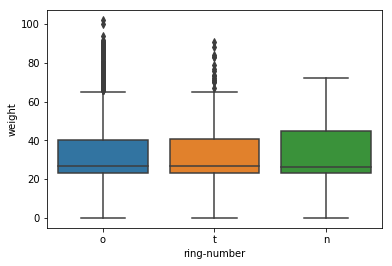

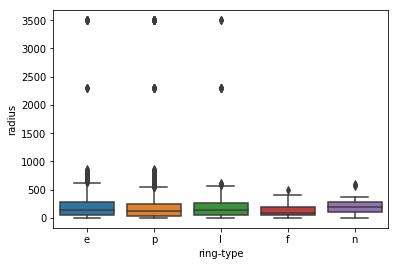

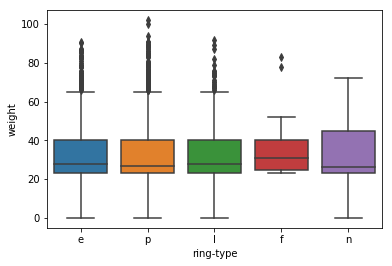

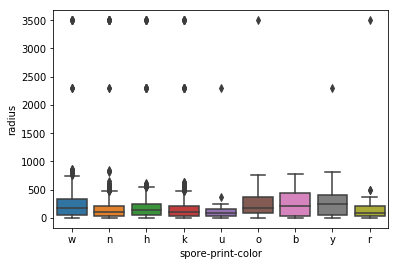

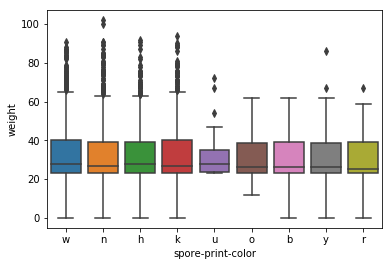

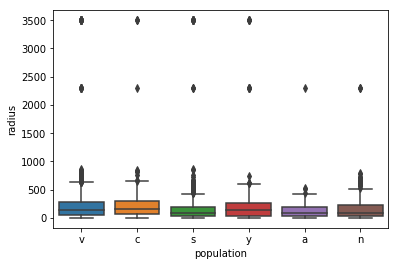

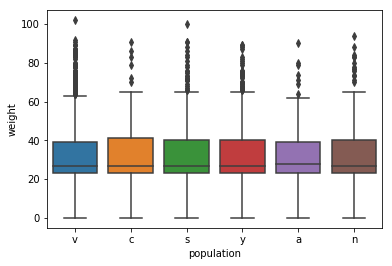

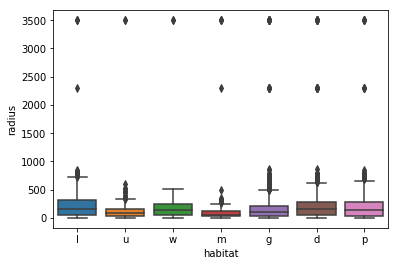

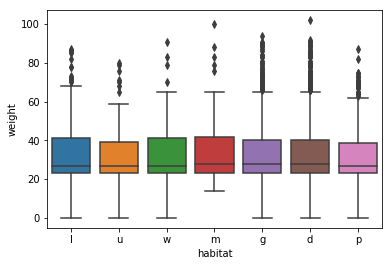

In [23]:
# Box Plot

for i in categorical.iteritems():
    for j in continuous.iteritems():
        sns.boxplot(train[i[0]],train[j[0]])
        plt.show()


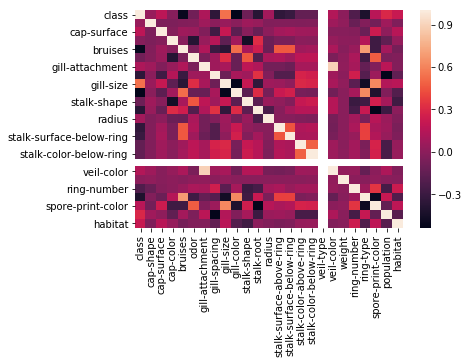

In [28]:
# A correlation between variables
sns.heatmap(train.corr())

### Label Encoder

In [24]:
# Encoding the train data
le=LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])

In [25]:
# Splitting the train and test data for better performance
X=train.iloc[:,1:]
y=train.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [27]:
#checking the size of the data
for data in [X_train,X_test,y_train,y_test]:
    print(data.shape)

(3809, 24)
(1877, 24)
(3809,)
(1877,)


## ML Pipeline Without Important Fearure Selection



In [60]:
# Logistic Regression
# Fitting our Model
model1=LogisticRegression()
model1.fit(X_train,y_train)
#Checking accuracy on train
LR_acc_train=accuracy_score(model1.predict(X_train),y_train)
#checking accuracy on test set
LR_acc_test=accuracy_score(model1.predict(X_test),y_test)

In [61]:
print "Accuracy Score on Train Set for Logistic Regression: ",LR_acc_train*100
print "Accuracy Score on Test Set for Logistic Regression: ",LR_acc_test*100

Accuracy Score on Train Set for Logistic Regression:  0.950118141244
Accuracy Score on Test Set for Logistic Regression:  0.946190729888


### Decision Tree

In [62]:
#Fitting our Model
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
#Checking accuracy on train
DT_acc_train=accuracy_score(model2.predict(X_train),y_train)
#checking accuracy on test set
DT_acc_test=accuracy_score(model2.predict(X_test),y_test)

In [64]:
print "Accuracy Score on Train Set for Decision Tree: ",DT_acc_train*100
print "Accuracy Score on Test Set for Decision Tree: ",DT_acc_test*100

Accuracy Score on Train Set for Decision Tree:  100.0
Accuracy Score on Test Set for Decision Tree:  100.0


### Random Forest Classifier

In [69]:
#Fitting our Model
model3=RandomForestClassifier(n_estimators=10)
model3.fit(X_train,y_train)
#Checking accuracy on train
RFC_acc_train=accuracy_score(model3.predict(X_train),y_train)
#checking accuracy on test set
RFC_acc_test=accuracy_score(model3.predict(X_test),y_test)

In [70]:
print "Accuracy Score on Train Set for Random Forest: ",RFC_acc_train*100
print "Accuracy Score on Test Set for Random Forest: ",RFC_acc_test*100

Accuracy Score on Train Set for Random Forest:  100.0
Accuracy Score on Test Set for Random Forest:  100.0


### SVM

In [73]:
#Fitting our Model
model4=SVC()
model4.fit(X_train,y_train)
#Checking accuracy on train
SVM_acc_train=accuracy_score(model4.predict(X_train),y_train)
#checking accuracy on test set
SVM_acc_test=accuracy_score(model4.predict(X_test),y_test)

In [74]:
print "Accuracy Score on Train Set for SVM: ",SVM_acc_train*100
print "Accuracy Score on Test Set for SVM: ",SVM_acc_test*100

Accuracy Score on Train Set for SVM:  99.8687319506
Accuracy Score on Test Set for SVM:  83.8572189664


### Cross Validation Score for the above Algorithms

In [77]:

from sklearn.model_selection import cross_val_score
print("Random Forests: ")
print(cross_val_score(model3, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model3, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

print("\n\nSVM:")
print(cross_val_score(model4, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model4, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)
 
print("\n\nLog:")
print(cross_val_score(model1, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)

print("\n\nDecision Tree:")
print(cross_val_score(model2, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Decision Tree is: " , accuracy)

Random Forests: 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
('Accuracy of Random Forests is: ', 100.0)


SVM:
[ 0.82722513  0.79057592  0.832021    0.82152231  0.84251969  0.84776903
  0.86089239  0.81578947  0.85789474  0.81842105]
('Accuracy of SVM is: ', 83.146307197271312)


Log:
[ 0.94764398  0.95811518  0.94488189  0.94750656  0.95800525  0.93700787
  0.95538058  0.94210526  0.95        0.95      ]
('Accuracy of SVM is: ', 94.906465776925302)


Decision Tree:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
('Accuracy of Decision Tree is: ', 100.0)


## Making Predictions on Test Data

In [104]:

l=LabelEncoder()
for col in test.columns:
    test[col] = l.fit_transform(test[col])
test.drop(['prediction'],axis=1,inplace=True)
test['prediction']=model3.predict(test)
print "Edible:",test['prediction'].value_counts()[0]*100.0/test.shape[0]
print "Poisonous:",test['prediction'].value_counts()[1]*100.0/test.shape[0]


Edible: 51.8047579984
Poisonous: 48.1952420016


## Feature Importance
##### Since, Random Forest performs the best on the cross validation data.
We shall use it `RFC` for feature selection


Feature ranking:
1. feature gill-spacing (0.200781)
2. feature bruises (0.131332)
3. feature spore-print-color (0.127946)
4. feature ring-type (0.082414)
5. feature gill-size (0.073868)
6. feature ring-number (0.068012)
7. feature stalk-surface-above-ring (0.056237)
8. feature radius (0.039557)
9. feature population (0.039322)
10. feature cap-color (0.035712)
11. feature gill-attachment (0.033427)
12. feature stalk-shape (0.025947)
13. feature cap-surface (0.019628)
14. feature stalk-surface-below-ring (0.017058)
15. feature weight (0.014986)
16. feature stalk-color-above-ring (0.013240)
17. feature odor (0.005884)
18. feature cap-shape (0.005320)
19. feature class (0.004592)
20. feature veil-type (0.002075)
21. feature gill-color (0.000971)
22. feature stalk-root (0.000903)
23. feature veil-color (0.000787)
24. feature stalk-color-below-ring (0.000000)


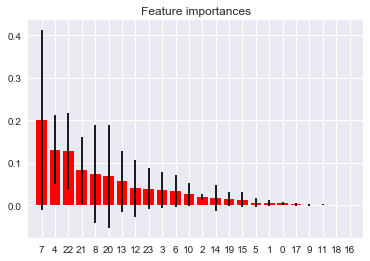

In [83]:
importances=model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Thus, it can be seen that all features are not important.<br>
`gill-spacing and bruises` are highly influencing the poisonous state of mushrooms<br>
whereas features like `stalk-root`, `veil-color`,`stalk-color-below-ring` are almost useless in prediction<br>
So, we will again make predictions using important features

### Building our ML Pipeline with important features


In [111]:
#Selecting important features
predictors=['gill-spacing','bruises','spore-print-color','ring-type','gill-size'
,'ring-number','stalk-surface-above-ring','radius','population','cap-color',
'gill-attachment','stalk-shape','cap-surface']
data_train=X_train[predictors]
data_test=X_test[predictors]

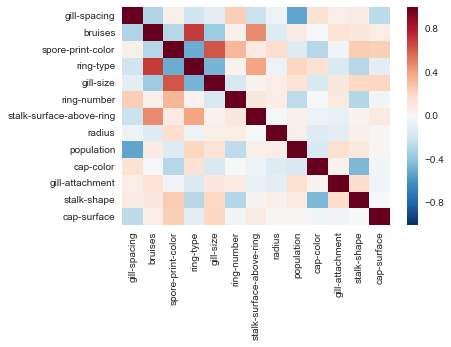

In [131]:
##A correlation between new variables
sns.heatmap(data_train.corr())

### Fitting all Models and Checking the CV score

In [119]:

models=[LogisticRegression(),DecisionTreeClassifier(random_state=0),RandomForestClassifier(n_estimators=10),SVC()]
model_names=['LR','DT','RFC','SVM']
for model in models:
    print("\n\n%s:"%model_names[models.index(model)])
    print(cross_val_score(model, data_train, y_train, scoring='accuracy', cv = 10))
    accuracy = cross_val_score(model, data_train, y_train, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy of %s is: %f"%(model_names[models.index(model)],accuracy))



LR:
[ 0.94764398  0.95026178  0.93963255  0.92388451  0.95013123  0.93700787
  0.95013123  0.92368421  0.93684211  0.93684211]
Accuracy of LR is: 93.960616


DT:
[ 0.9973822   0.9973822   0.99737533  1.          1.          0.99212598
  1.          1.          0.99736842  0.99736842]
Accuracy of DT is: 99.790026


RFC:
[ 0.9973822   0.9973822   1.          0.99737533  1.          0.99475066
  1.          1.          1.          0.99736842]
Accuracy of RFC is: 99.868697


SVM:
[ 0.88481675  0.87958115  0.89238845  0.86614173  0.88451444  0.88188976
  0.89238845  0.86578947  0.91052632  0.85789474]
Accuracy of SVM is: 88.159313


## Random Forest Performs the Best
###### Though there is a little change in the accuracy. The performance of SVM has increased.

## Predicting using our New Feature Model

In [124]:

rfc=models[2].fit(data_train,y_train)
predictions=pd.Series(models[2].predict(test[predictors]))
predictions.head()


0    0
1    1
2    0
3    1
4    0
dtype: int64

In [125]:
print "Edible:",predictions.value_counts()[0]*100.0/test.shape[0]
print "Poisonous:",predictions.value_counts()[1]*100.0/test.shape[0]

Edible: 51.9688269073
Poisonous: 48.0311730927


### Clearly, there is a diff. in the % of edible mushrooms :wink: